# Overview

This notebook contains the introduction on fundemental ideas behind Bayesian Networks (BN). A case study on Train-Usage survey will be used to show how to interpret BN.




## Problem Statement

> Customer Personality Analysis is an extensive analysis of company's ideal customers. 

> Its objective is to help business to better understand its customers and makes it easier for them to modify products according to the specifics needs of different types of customer segments which are categorized based on their behaviors and concerns.

> For example, instead of spending maney for marketing a new product, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.





## About Dataset

Attributes

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made - with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Objective

> Perform customer segmentations

# Importing Libraries

In [118]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
# !pip install ydata-quality
# !pip install pyod
# !pip install combo

In [119]:
#Importing the Libraries

#data processing
import numpy as np
import pandas as pd
import datetime
import math

#viz
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#stats and modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Loading Data

In [120]:
# import os
# os.environ['KAGGLE_USERNAME'] = "ramdhanhidayat" # kaggle
# os.environ['KAGGLE_KEY'] = "f35f5c786b56fc2d079ab60d05fdf117" # key from the json file

# #download dataset from kaggle
# !kaggle datasets download -d imakash3011/customer-personality-analysis

# #unzip the downloaded data to 'data' folder
# !unzip customer-personality-analysis.zip -d data

# data = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [121]:
data = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [122]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

**Observation from the above output**:
- There are 24 missing values in `income`, which is 1% of the whole data

- Dt_Customer, which indicates the date a customer joined the database is not parsed as DateTime data type

- There are some categorical features in our data frame.Encoding them into numeric forms would be required later.

## Data Type

In [123]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
print("The newest customer's enrolment in the records:", data['Dt_Customer'].max().date())
print("The oldest customer's enrolment date in the records:", data['Dt_Customer'].min().date())


The newest customer's enrolment in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


## Missing Value


In [124]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The income variable has 24 missing values, which constitues 1% of the entire dataset. Before deciding what to do with it (remove vs impute), certain assumptions have to be checked related to these missing values.


Text(62.09375, 0.5, 'Columns')

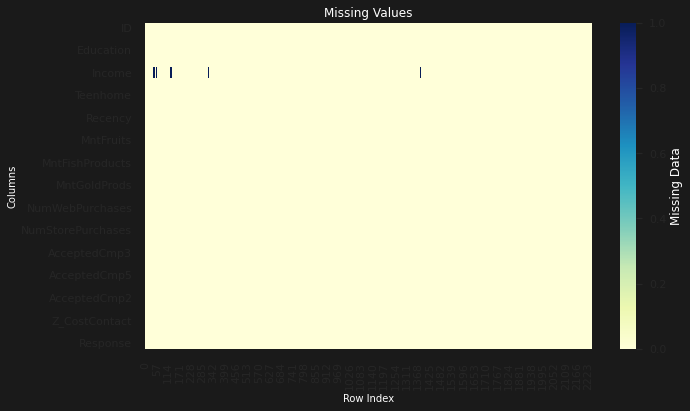

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=12)
plt.xlabel('Row Index', fontsize = 10) 
plt.ylabel('Columns', fontsize = 10)

In [126]:
#drop missing values
data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Duplicated Values

In [127]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## Creating new features



-  customer_for : the number of days the customers started shpping in the store relative to the last recorded date

- Age
- Total Spending 
- Kid Home
- Living_With
- Is_Parent


**generation**

The generation category definition by Pew Research Centre:
- The Silent Generation: Born 1928-1945 (76-93 years old)
- Baby Boomers: Born 1946-1964 (57-75 years old)
- Generation X: Born 1965-1980 (41-56 years old)
- Millennials: Born 1981-1996 (25-40 years old)
- Generation Z: Born 1997-2012 (9-24 years old)
- Generation Alpha: Born 2010-2025 (0-11 years old)

In [ ]:
num_days = []
dates = data['Dt_Customer'].apply(lambda x: x.date())
d1 = max(dates)

for i in dates:
  delta = d1 - i
  num_days.append(delta)

data['Customer_For'] = num_days
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors='coerce')

#Age of customer today
data['Age'] = 2022 - data['Year_Birth']

#Total spendings on various items
data['TotalSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

#living situation by marital status
data['Living_With'] = data['Marital_Status'].replace({
    "Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"
})

#Feature indicating total children living in the household
data['Children'] = data['Kidhome'] + data['Teenhome']

#Feature for total members in the household
data['Family_Size'] = data['Living_With'].replace({"Alone": 1, "Partner":2}) + data['Children']

#Feature parenthood status
data["Is_Parent"] = np.where(data["Children"]>0, 1, 0)

#Education segmentation
data["Education"] = data["Education"]\
                      .replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", 
                                "Master":"Postgraduate", "PhD":"Postgraduate"})

#Generation
conditions = [
    data['Year_Birth'].lt(1922),
    data['Year_Birth'].ge(1922) & data['Year_Birth'].le(1927),
    data['Year_Birth'].ge(1928) & data['Year_Birth'].le(1945),
    data['Year_Birth'].ge(1946) & data['Year_Birth'].le(1954),
    data['Year_Birth'].ge(1955) & data['Year_Birth'].le(1964),
    data['Year_Birth'].ge(1965) & data['Year_Birth'].le(1980),
    data['Year_Birth'].ge(1981) & data['Year_Birth'].le(1996),
    data['Year_Birth'].ge(1997) & data['Year_Birth'].le(2012),
    data['Year_Birth'].ge(2010) & data['Year_Birth'].le(2025)
]

generations = ['Pre-WWII', 'WWII', 'Post-War', 'Boomers1', 'Boomers2', 'Gen-X', 'Millenials', 'Gen-Z', 'Gen-Alpha']
data['generation'] = np.select(conditions, generations)

#dropping some redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth']

data2 = data.drop(to_drop, axis=1)

## Outliers

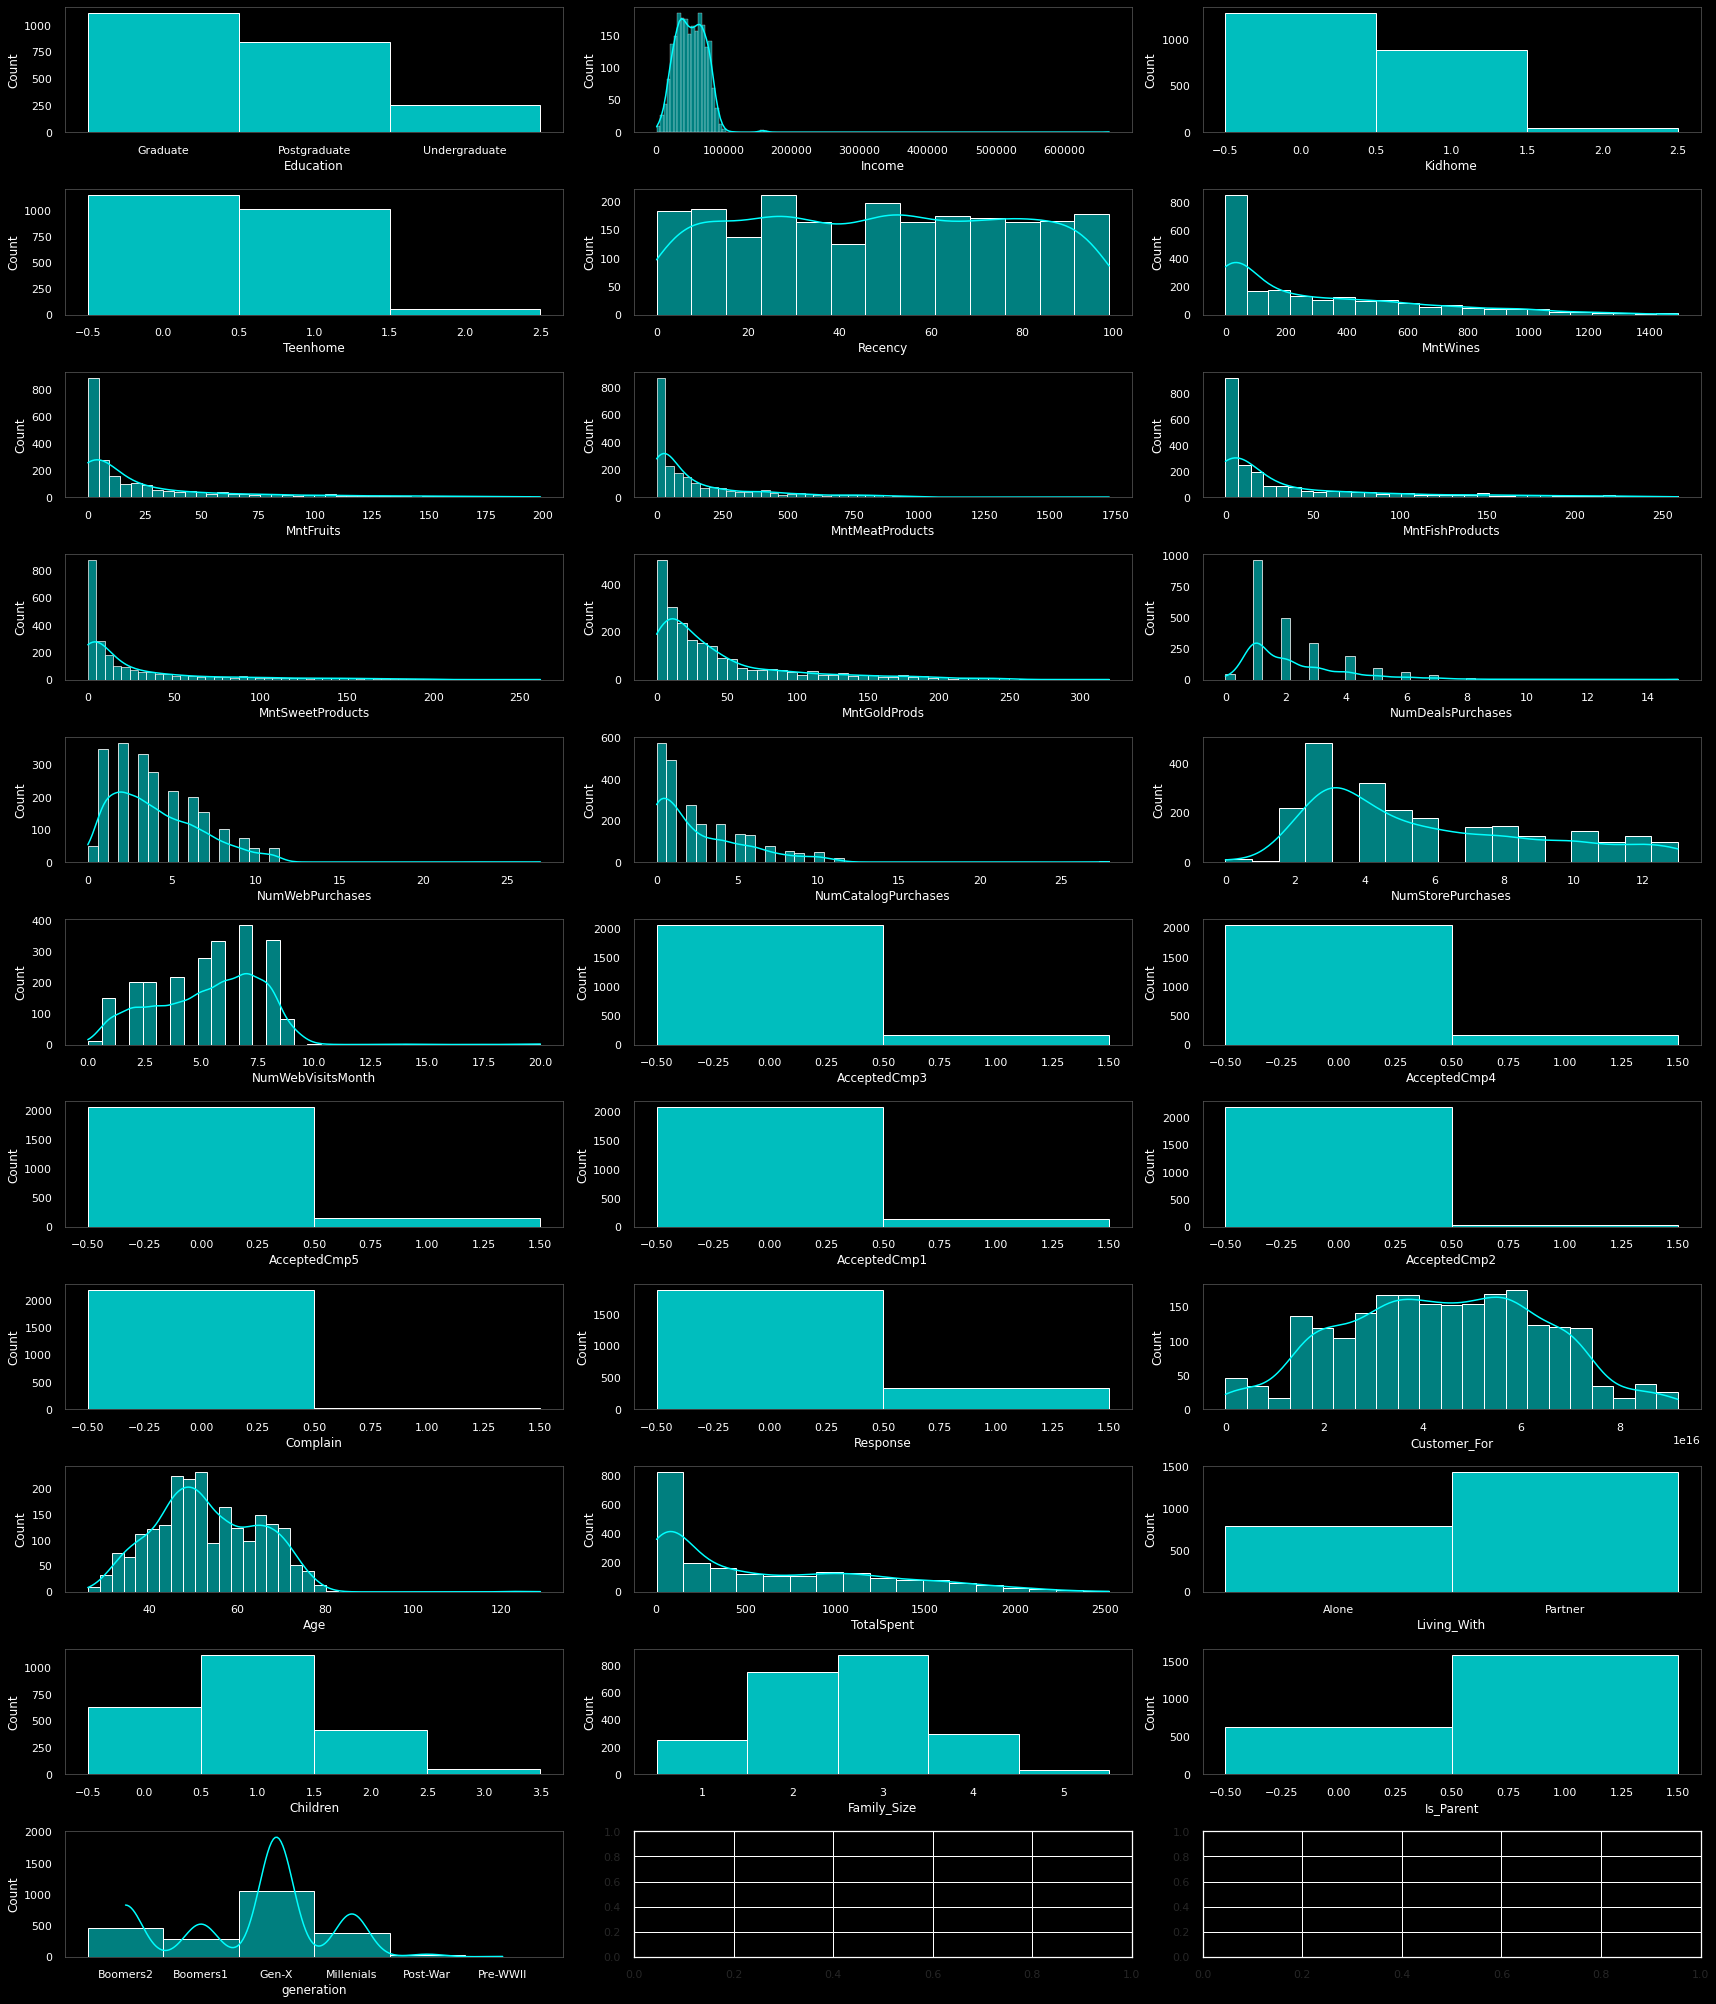

In [129]:
plot_ncols = 3
plot_nrows = math.ceil(len(data2.columns)/plot_ncols)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'k', 'axes.labelcolor':'white', 'text.color':'white'})
f, axes = plt.subplots(plot_nrows, plot_ncols, figsize=(24,28), sharex=False, sharey=False, facecolor='black')
for ax, feature in zip(axes.flat, data2.columns):
  ax.tick_params(labelcolor='white')
  ax.grid(False)
  for _,s in ax.spines.items():
      s.set_linewidth(0.5)
      s.set_color('grey')
  if data[feature].nunique() > 5:
    sns.histplot(data2[feature], color='aqua', kde=True, ax=ax)
  else: 
    sns.histplot(data2[feature], color='aqua', kde=False, discrete=True, ax=ax)

plt.tight_layout()

In [130]:
data2['generation'].value_counts()

Gen-X         1061
Boomers2       459
Millenials     380
Boomers1       290
Post-War        23
Pre-WWII         3
Name: generation, dtype: int64

In [131]:
data2.loc[data2['generation']=='0']

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Family_Size,Is_Parent,generation


In [132]:
data[['Age', 'Year_Birth', 'generation']].loc[data['generation']=='0']

,Age,Year_Birth,generation


In [133]:
#count outliers
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3-Q1


numerical_df = data.select_dtypes(include=np.number)
numerical_df = numerical_df.drop('Response', axis=1)

#outlier dataframe
outlier_count = ((numerical_df < (Q1-1.5*IQR)) | (numerical_df > (Q3 + 1.5*IQR))).sum() #outlier count 
outlier_df = pd.DataFrame(outlier_count, columns=['outlier_count']).rename_axis('variable')
outlier_df['percentage'] = outlier_df['outlier_count']/len(data)*100 #outlier percentage columns

#select numerical columns with unique values more than 5 
# numerical_df = data[[c for c in list(data) if data[c].nunique()>5]].select_dtypes(include=np.number)


pd.set_option('display.precision', 2)
outlier_df.sort_values('outlier_count', ascending=False).style.background_gradient(cmap='gist_heat').set_caption('Outlier Count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,outlier_count,percentage
variable,,
MntSweetProducts,246,11.10
MntFruits,246,11.10
MntFishProducts,222,10.02
MntGoldProds,205,9.25
MntMeatProducts,174,7.85
AcceptedCmp4,164,7.40
AcceptedCmp3,163,7.36
AcceptedCmp5,162,7.31
AcceptedCmp1,142,6.41


In [134]:
import plotly.graph_objs as go
import plotly
from plotly.subplots import make_subplots

nunique_df = pd.DataFrame(data=data2.select_dtypes(include=np.number).apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
plot_nrows = 4
plot_ncols = 4
fig = make_subplots(rows=plot_nrows, cols=plot_ncols, subplot_titles=tuple(selection))

#add traces
x = 0
for i in range(1, plot_nrows+1):
  for j in range(1, plot_ncols+1):
    fig.add_trace(go.Box(y=data2[selection[x]], name=selection[x]), row=i, col=j)

    x=x+1

fig.update_layout(height=1000, width=1000, showlegend=False, template='plotly_dark', title='Boxplot of Customer Data')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()


#static version
# fig, axes = plt.subplots(6, 3, figsize=(18,25))
# for i, col in enumerate(selection):
#   ax = sns.boxplot(y=data[col], ax=axes.flatten()[i])
#   ax.set_ylim(data[col].min(), data[col].max())
#   ax.set_ylabel(col + ' / Unit')

# plt.show()

In [135]:
data2[data2['Income']>150000]

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Family_Size,Is_Parent,generation
164,Postgraduate,157243.0,0,1,98,20,2,1582,1,2,...,0,0,29116800000000000,49,1608,Partner,1,3,1,Gen-X
617,Postgraduate,162397.0,1,1,31,85,1,16,2,1,...,0,0,55296000000000000,46,107,Partner,2,4,1,Gen-X
655,Graduate,153924.0,0,0,81,1,1,1,1,1,...,0,0,13564800000000000,47,6,Alone,0,1,0,Gen-X
687,Postgraduate,160803.0,0,0,21,55,16,1622,17,3,...,0,0,83980800000000000,40,1717,Partner,0,2,0,Millenials
1300,Postgraduate,157733.0,1,0,37,39,1,9,2,0,...,0,0,52617600000000000,51,59,Partner,1,3,1,Gen-X
1653,Graduate,157146.0,0,0,13,1,0,1725,2,1,...,0,0,50630400000000000,45,1730,Partner,0,2,0,Gen-X
2132,Postgraduate,156924.0,0,0,85,2,1,2,1,1,...,0,0,40089600000000000,73,8,Partner,0,2,0,Boomers1
2233,Graduate,666666.0,1,0,23,9,14,18,8,1,...,0,0,57715200000000000,45,62,Partner,1,3,1,Gen-X


In [136]:
data2[data2['NumCatalogPurchases']>11]

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Family_Size,Is_Parent,generation
21,Graduate,2447.0,1,0,42,1,1,1725,1,1,...,0,0,47779200000000000,43,1730,Partner,1,3,1,Gen-X
164,Postgraduate,157243.0,0,1,98,20,2,1582,1,2,...,0,0,29116800000000000,49,1608,Partner,1,3,1,Gen-X
687,Postgraduate,160803.0,0,0,21,55,16,1622,17,3,...,0,0,83980800000000000,40,1717,Partner,0,2,0,Millenials
1653,Graduate,157146.0,0,0,13,1,0,1725,2,1,...,0,0,50630400000000000,45,1730,Partner,0,2,0,Gen-X


In [137]:
data2[data2['NumWebVisitsMonth']>10]

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Family_Size,Is_Parent,generation
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,...,0,0,23155200000000000,72,49,Partner,2,4,1,Boomers1
774,Postgraduate,6835.0,0,1,76,107,2,12,2,2,...,0,0,73094400000000000,65,137,Partner,1,3,1,Boomers2
981,Graduate,4861.0,0,0,20,2,1,1,1,0,...,0,0,14428800000000000,57,6,Alone,0,1,0,Gen-X
1042,Graduate,8028.0,0,0,62,73,18,66,7,12,...,0,0,69897600000000000,31,178,Alone,0,1,0,Millenials
1245,Graduate,1730.0,0,0,65,1,1,3,1,1,...,0,0,17452800000000000,51,8,Alone,0,1,0,Gen-X
1328,Postgraduate,6560.0,0,0,2,67,11,26,4,3,...,0,0,31017600000000000,40,373,Alone,0,1,0,Millenials
1524,Graduate,3502.0,1,0,56,2,1,1,0,0,...,0,0,52012800000000000,49,5,Alone,1,2,1,Gen-X
1846,Postgraduate,4023.0,1,1,29,5,0,1,1,1,...,0,0,14342400000000000,59,9,Partner,2,4,1,Boomers2
2214,Graduate,5305.0,0,1,12,12,4,7,1,3,...,0,0,42681600000000000,46,32,Partner,1,3,1,Gen-X


In [138]:
#filter multiple conditions
import functools

def conjunction(*conditions):
  return functools.reduce(np.logical_and, conditions)

cond1 = data2.Age < 90
cond2 = data2.Income < 150000
cond3 = data2.NumCatalogPurchases < 11
cond4 = data2.NumWebVisitsMonth < 13
cond5 = data2.NumWebPurchases < 20
cond6 = data2.MntSweetProducts < 200
cond7 = data2.MntMeatProducts < 1500
cond8 = data2.MntGoldProds < 290


data_filtered = data2[conjunction(cond1, cond2, cond3, cond4, cond5, cond6, cond7, cond8)]
print("Number of data points after outlier removal:", len(data_filtered))

Number of data points after outlier removal: 2173


In [139]:
nunique_df = pd.DataFrame(data=data_filtered.select_dtypes(include=np.number).apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
plot_nrows = 4
plot_ncols = 4
fig = make_subplots(rows=plot_nrows, cols=plot_ncols, subplot_titles=tuple(selection))

#add traces
x = 0
for i in range(1, plot_nrows+1):
  for j in range(1, plot_ncols+1):
    fig.add_trace(go.Box(y=data_filtered[selection[x]], name=selection[x]), row=i, col=j)

    x=x+1

fig.update_layout(height=1000, width=1000, showlegend=False, template='plotly_dark', title='Boxplot of Customer Data')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()


#static version
# fig, axes = plt.subplots(6, 3, figsize=(18,25))
# for i, col in enumerate(selection):
#   ax = sns.boxplot(y=data[col], ax=axes.flatten()[i])
#   ax.set_ylim(data[col].min(), data[col].max())
#   ax.set_ylabel(col + ' / Unit')

# plt.show()

In [140]:
#save cleaned data to csv
data_filtered.to_csv('marketing_campaign_cln.csv', index=False)

# Exploratory Data Analysis